# Contrast pyro between TFP

- https://www.upgrad.com/blog/statistical-programming-in-machine-learning/

In [1]:
import pyro
import torch

import matplotlib.pyplot as plt
import numpy as np

# distributions [pyro]

- Most distributions in pyro are thin wrapper around Pytorch distributions
    - ```torch.distributions.distribution.Dsitribution```
        - https://pytorch.org/docs/stable/distributions.html
    - interface 차이 between 'torch distribution' and 'Pyro'
        - see https://docs.pyro.ai/en/dev/distributions.html


In [2]:
torch.manual_seed(0)
np.random.seed(0)
pyro.set_rng_seed(0)

# Multivariate distributions [pyro]

## Multivariate Normal

### initialization

- 'scale_diag' arguments : covariance matrix (default = identity covariance matrix(spherical covariance matrix))
- event_shape = un-empty

In [8]:
# 차이점 1 : torch.FloatTensor로 넣기
# 차이점 2 : parameter 이름이 covariance_matrix
# 차이점 3 : covariance matrix를 직접 n x n 으로 넣어줘야 함.(TFD는 'MultivariateNormalDiag'로 initiation할 땐, diag entry만 넣어주면 됨)

mv_normal = pyro.distributions.MultivariateNormal(loc=torch.FloatTensor([-1, 0.5]), 
                                                  covariance_matrix=torch.FloatTensor([[1., 0],
                                                                                       [0, 1.5]]))

In [9]:
mv_normal

MultivariateNormal(loc: torch.Size([2]), covariance_matrix: torch.Size([2, 2]))

In [10]:
mv_normal.event_shape

torch.Size([2])

In [11]:
mv_normal.batch_shape

torch.Size([])

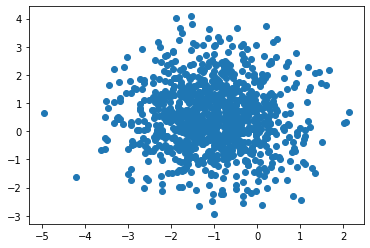

In [66]:
samples = mv_normal.sample([1000])
plt.scatter(samples[:,0], samples[:,1])
plt.show()

### sampling

In [15]:
print(mv_normal.sample([3]).shape)
mv_normal.sample([3])

torch.Size([3, 2])


tensor([[-1.8920, -1.3483],
        [-0.6296,  2.2838],
        [-0.0602,  1.4490]])

### batched distribution(normal)

In [19]:
batched_normal = pyro.distributions.MultivariateNormal(
    loc=torch.FloatTensor([[-1, 0.5], 
                           [10, 20]]), 
    covariance_matrix=torch.FloatTensor([
        [[1., 0],[0, 1.5]],
        [[3, 0],[0, 5]]
    ]))

In [20]:
batched_normal.event_shape

torch.Size([2])

In [21]:
batched_normal.batch_shape

torch.Size([2])

In [24]:
print(batched_normal.sample([3]).shape)
batched_normal.sample([3])

torch.Size([3, 2, 2])


tensor([[[ 1.0576,  0.4566],
         [10.1086, 18.2865]],

        [[ 0.0993,  3.8761],
         [10.3036, 17.9171]],

        [[-2.5055, -0.3095],
         [12.2919, 20.0830]]])

In [26]:
mv_normal.log_prob(torch.FloatTensor([-1,1]))

tensor(-2.1239)

In [27]:
batched_normal.log_prob(torch.FloatTensor([-1,1]))

tensor([ -2.1239, -59.4586])

In [28]:
batched_normal.log_prob(batched_normal.sample([3]))

tensor([[-2.0901, -9.8228],
        [-2.2021, -5.1826],
        [-3.6988, -4.7897]])

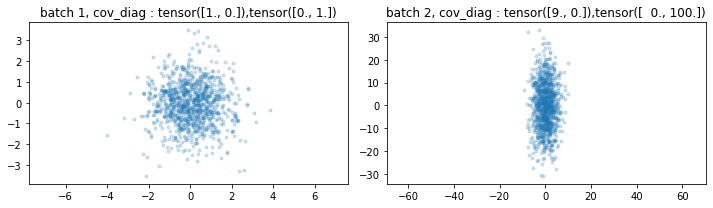

In [71]:
# plot each batch distributions

batched_mv_normal2 = pyro.distributions.MultivariateNormal(
    loc=torch.FloatTensor([[0, 0], 
                           [0, 0]]), 
    covariance_matrix=torch.FloatTensor([
        [[1, 0],[0, 1]],
        [[9, 0],[0, 100]]
    ]))

samples_for_plot = batched_mv_normal2.sample([1000])

fig, axes = (plt.subplots(1,2, sharex=False, sharey=False, figsize=(10,3)))
titles = [f'batch 1, cov_diag : {batched_mv_normal2.covariance_matrix[0][0]},{batched_mv_normal2.covariance_matrix[0][1]}',
          f'batch 2, cov_diag : {batched_mv_normal2.covariance_matrix[1][0]},{batched_mv_normal2.covariance_matrix[1][1]}']

for i, (ax, title) in enumerate(zip(axes, titles)):
    samples_per_batch = samples_for_plot[:, i, :]
    ax.scatter(samples_per_batch[:, 0], samples_per_batch[:, 1], marker='.', alpha=0.2)
    ax.set_title(title)
    ax.axis('equal')
plt.tight_layout()
plt.show()
